<a href="https://colab.research.google.com/github/raju1207/Swiggy-Chennai-Data-Analysis/blob/main/Swiggy_Chennai_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [5]:
Swiggy_Data = pd.read_csv('Swiggy chennai dataset.csv')

In [ ]:
Swiggy_Data

,city,subcity,restaurant,rating,rating count,cost,cuisine,menu,item,price,veg_or_non_veg
0,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Regular Falooda,100.0,Veg
1,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Vanilla Falooda,110.0,Veg
2,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Strawberry Falooda,110.0,Veg
3,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Chocolate Falooda,130.0,Veg
4,Chennai,Poonamallee,LASSI AND SOUP CORNER,4.1,Too Few Ratings,200,Juices,Falooda,Butterscotch Falooda,130.0,Veg
...,...,...,...,...,...,...,...,...,...,...,...
162515,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Poha,130.0,Veg
162516,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Upma,108.0,Veg
162517,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,North India Thali,175.0,Veg
162518,Chennai,Purasawalkam,Jain Food Service Chennai,2.8,20+ ratings,400,Thalis,North Indian,Aloo Parathas,130.0,Veg


In [6]:
Swiggy_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9417 entries, 0 to 9416
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            9417 non-null   object 
 1   subcity         9417 non-null   object 
 2   restaurant      9416 non-null   object 
 3   rating          9416 non-null   float64
 4   rating count    9416 non-null   object 
 5   cost            9416 non-null   float64
 6   cuisine         9416 non-null   object 
 7   menu            9416 non-null   object 
 8   item            9416 non-null   object 
 9   price           2148 non-null   float64
 10  veg_or_non_veg  9416 non-null   object 
dtypes: float64(3), object(8)
memory usage: 809.4+ KB


In [ ]:
#Q-1: Which are the top 5 most popular cuisines based on the number of menu items listed?

In [7]:
# Calculate the top 5 most popular cuisines based on the number of menu items listed
top_cuisines = Swiggy_Data['cuisine'].value_counts().head(5)

# Display the result
print("Top 5 most popular cuisines based on the number of menu items listed:")
print(top_cuisines)

Top 5 most popular cuisines based on the number of menu items listed:
cuisine
South Indian            803
North Indian,Chinese    565
Indian                  439
Biryani                 354
Indian,Biryani          256
Name: count, dtype: int64


In [ ]:
#Q-2: Which subcity in Chennai has the most restaurants listed, and how does it compare with others?

In [8]:
# Find the subcity with the most restaurants listed
subcity_counts = Swiggy_Data['subcity'].value_counts()
top_subcity = subcity_counts.idxmax()
top_subcity_count = subcity_counts.max()

# Display the top subcity and its count, along with the top 5 subcities
print(f"The subcity with the most restaurants listed is: {top_subcity} ({top_subcity_count} restaurants).")
print("\nTop 5 subcities with the most restaurants listed:")
print(subcity_counts.head(5))

The subcity with the most restaurants listed is: OMR Navalur (3748 restaurants).

Top 5 subcities with the most restaurants listed:
subcity
OMR Navalur    3748
Poonamallee    2965
Mylapore       2703
M                 1
Name: count, dtype: int64


In [ ]:
#Q-3: What is the average price of food items across different cuisines? Are there specific cuisines that are generally more expensive?

In [9]:
# Filter rows where price is not null to focus on items with valid prices
valid_prices = Swiggy_Data[Swiggy_Data['price'].notnull()]

# Group by 'cuisine' and calculate the average price for each cuisine
average_price_per_cuisine = valid_prices.groupby('cuisine')['price'].mean().sort_values(ascending=False)

# Display the top 5 cuisines with the highest average price
print("Top 5 cuisines with the highest average price:")
print(average_price_per_cuisine.head(5))

# Display the overall average price across all cuisines
overall_average_price = valid_prices['price'].mean()
print(f"\nOverall average price of food items: {overall_average_price:.2f}")

Top 5 cuisines with the highest average price:
cuisine
Desserts                796.086957
Fast Food,Salads        300.752632
Biryani,Chinese         285.566667
North Indian,Arabian    227.352941
Desserts,Beverages      225.000000
Name: price, dtype: float64

Overall average price of food items: 169.98


In [ ]:
#Q-4: What is the proportion of vegetarian vs. non-vegetarian items in the dataset? Which type has more variety?

In [10]:
# Count the number of vegetarian and non-vegetarian items
veg_nonveg_counts = Swiggy_Data['veg_or_non_veg'].value_counts()

# Calculate the proportion of each type
veg_nonveg_proportions = (veg_nonveg_counts / veg_nonveg_counts.sum()) * 100

# Identify which type has more variety
more_variety = veg_nonveg_counts.idxmax()

# Display the results
print("Proportion of Vegetarian vs. Non-Vegetarian items:")
print(veg_nonveg_proportions)

print(f"\nThe type with more variety is: {more_variety} ({veg_nonveg_counts[more_variety]} items).")


Proportion of Vegetarian vs. Non-Vegetarian items:
veg_or_non_veg
Veg        60.014868
Non-veg    39.985132
Name: count, dtype: float64

The type with more variety is: Veg (5651 items).


In [ ]:
#Q-5: How are the ratings distributed across restaurants? Are there any patterns or clusters of high or low ratings?

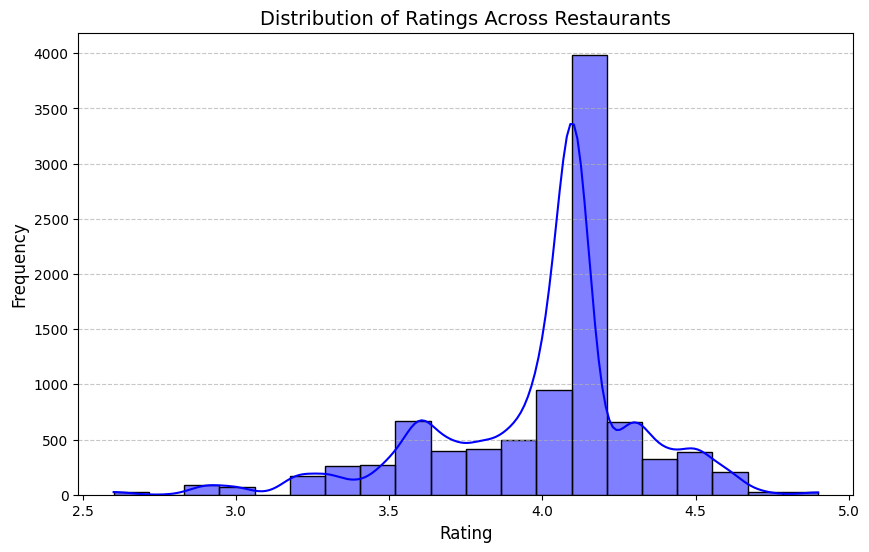

Rating Statistics:
count    9416.000000
mean        3.994892
std         0.333042
min         2.600000
25%         3.875000
50%         4.100000
75%         4.100000
max         4.900000
Name: rating, dtype: float64


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid ratings (ensure they are numeric)
valid_ratings = Swiggy_Data['rating'][Swiggy_Data['rating'].notnull()]

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(valid_ratings, bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Ratings Across Restaurants', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Display basic statistics for the ratings
rating_statistics = valid_ratings.describe()
print("Rating Statistics:")
print(rating_statistics)